#Hausarbeit

#Initialisierung

In [0]:
import numpy as np #wandelt tabellen in matrizen und vektoren
import pandas as pd #pandas laden
from sklearn.linear_model import SGDClassifier # verwendete methode laden, classifier macht 0,1 als ergebnis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #unterordner für diese Funktionspakete um genauigkeiten zu bestimmen 
from sklearn.model_selection import KFold, train_test_split # import von kfold zur validierung 
from sklearn.preprocessing import LabelEncoder
import seaborn as picture #Grafig addin laden
import matplotlib
import matplotlib.pyplot as plt

##Datenimport

In [1292]:

data = pd.read_csv('https://github.com/saschaschworm/dsb/blob/master/Data%20Sets/Term%20Paper/bank_marketing/bank_marketing.csv?raw=true', sep=';')

data.head() #Anzeige der Daten

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1293]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [1294]:
data.describe() #statistische Auswertung

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##Data Dictionary


**age** = Alter  (numeric)

**job** = Job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

**marital** = Beziehungsstatus (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

**education** = Bildungsstand (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

**default** = Kreditausfall (categorical: 'no','yes','unknown')

**housing** = Immobilienkredit? (categorical: 'no','yes','unknown')

**loan** = Kredit (categorical: 'no','yes','unknown')

**contact** = Kontaktart (categorical: 'cellular','telephone')

**month** = Monat (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

**day_of_week** = Tag (categorical: 'mon','tue','wed','thu','fri')

**duration** =Kontaktdauer in s (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**campaign** = Anzahl Kontakte > number of contacts performed during this campaign and for this client (numeric, includes last contact)

**pdays** = Tage zur vorherigen Campange > number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

**previous** = Anzahl vorgeriger Kontakte gesamt>  number of contacts performed before this campaign and for this client (numeric)

**poutcome** = Ergebnis in vorheriger Campange> outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**emp.var.rate** = beschäftigungsquote ? employment variation rate - quarterly indicator (numeric)

**cons.price.idx** = Verbraucher Preis Index > Preiskorb Wert MArktkennzahl > Lebendsstandartwert d Kunden > consumer price index - monthly indicator (numeric)

**cons.conf.idx** = Kunden Vertrauen  an die Wirtschaftslage > Bereitschaft in die Wirtschaft zu investiern > consumer confidence index - monthly indicator (numeric)

**euribor3m** = Zinzsatz zu dem sich eine Bank 3 Monatzgelder zu leien > euribor 3 month rate - daily indicator (numeric)

**nr.employed** = Anzahl von angestellten ? > number of employees - quarterly indicator (numeric)

**y** = Abschluss? > has the client subscribed a term deposit? (binary: 'yes','no')



#Target Variable festlegen und analysieren

Target = y

In [1295]:
data['y'].unique() #Inhhalte von target prüfen

array(['no', 'yes'], dtype=object)

In [1296]:
data['y'].value_counts() #Inhalte Zählen


no     36548
yes     4640
Name: y, dtype: int64

In [1297]:
target_no = len(data[data['y']=='no'])
target_yes = len(data[data['y']=='yes'])
percent_no = target_no/(target_no+target_yes)
percent_yes = target_yes/(target_no+target_yes)

print(f'- kein Abschluss: {percent_no * 100:.2f}%')
print(f'- kein Abschluss: {percent_yes * 100:.2f}%')

- kein Abschluss: 88.73%
- kein Abschluss: 11.27%


##Target in Binary Convertieren

In [1298]:
data.y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [0]:
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['y'].values)

# Coding Categorical Values into Labeled Values
data['y'] = label_encoder.transform(data['y'].values)

In [1300]:
data.y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

##grafische Ausgabe testen

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


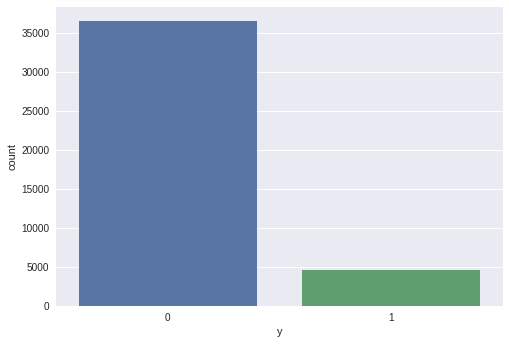

In [1301]:
picture.countplot(x='y' , data=data) # Grafig Ausgeben



#Features analysieren

In [1302]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


### Auffälligkeiten
- duration
- pdays
- previous
- euribor3m

##leere Felder suchen

In [1303]:
leer=data
leer.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 1 age
 Alter > numeric

Feature auslesen

In [1304]:
data['age'].unique() #Inhhalte von target prüfen


array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [1305]:
data.groupby(['y'])['age'].mean()

y
0    39.911185
1    40.913147
Name: age, dtype: float64

Age Kategorisieren


In [0]:
#Feature auslesen	
#Inhhalte von target prüfen
data['age_class']=data['age']

In [1307]:
#Feature kategorisieren
data['age_class'] = [90 if (i < 100)&(i >= 90) else i for i in data['age_class']]
data['age_class'] = [80 if (i < 90)& (i >= 80) else i for i in data['age_class']]
data['age_class'] = [70 if (i < 80)& (i >= 70) else i for i in data['age_class']]
data['age_class'] = [60 if (i < 70)& (i >= 60) else i for i in data['age_class']]
data['age_class'] = [50 if (i < 60)& (i >= 50) else i for i in data['age_class']]
data['age_class'] = [40 if (i < 50)& (i >= 40) else i for i in data['age_class']]
data['age_class'] = [30 if (i < 40)& (i >= 30) else i for i in data['age_class']]
data['age_class'] = [20 if (i < 30)& (i >= 20) else i for i in data['age_class']]
data['age_class'] = [10 if (i < 20)& (i >= 10) else i for i in data['age_class']]
data['age_class'] = [1  if (i < 10)& (i >=  0) else i for i in data['age_class']]
data.age_class.head()

0    50
1    50
2    30
3    40
4    50
Name: age_class, dtype: int64

In [1308]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.age_class)

age_class,10,20,30,40,50,60,70,80,90
y,,,,,,,,,
0,41,4706,15223,9692,6165,473,175,68,5
1,34,888,1715,834,697,251,144,72,5


In [1309]:
#Prozentual zeilenweise
pd.crosstab(index=data['age_class'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1).round(4)*100

y,0,1
age_class,,
10,54.67,45.33
20,84.13,15.87
30,89.87,10.13
40,92.08,7.92
50,89.84,10.16
60,65.33,34.67
70,54.86,45.14
80,48.57,51.43
90,50.00,50.00


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


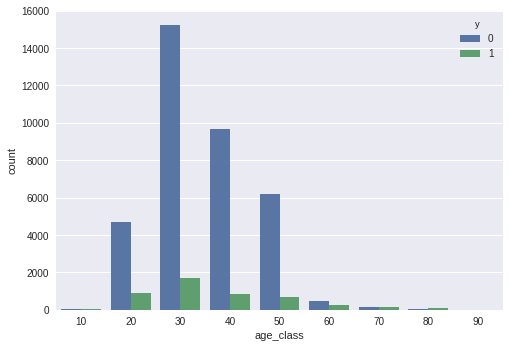

In [1310]:
# Grafig Ausgeben > Verhältnis zu y 
picture.countplot(x='age_class' , hue='y', data=data) 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98ff722908>,
      dtype=object)

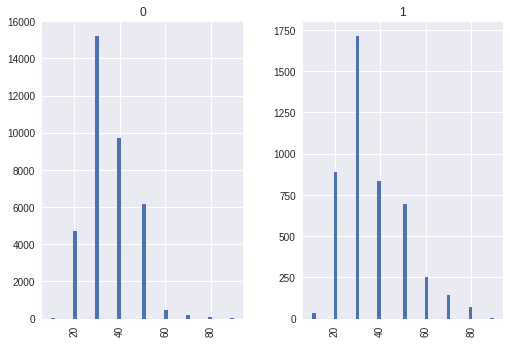

In [1311]:
data.hist(column="age_class",by="y",bins=50)

Format umwandeln

In [1312]:

# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['age_class'].values)

# Coding Categorical Values into Labeled Values
data['age_class'] = label_encoder.transform(data['age_class'].values)
data['age_class'].unique() #Inhhalte von target prüfen

array([4, 2, 3, 1, 5, 0, 6, 7, 8])

###2 job 
Beruf > Kategorie

In [1313]:
#Inhhalte von target prüfen
data['job'].unique() 

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [1314]:
#Inhalte Zählen
data['job'].value_counts() 

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [1315]:
#Prozentual zeilenweise
pd.crosstab(index=data['job'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1).round(4)*100

y,0,1
job,,
admin.,87.03,12.97
blue-collar,93.11,6.89
entrepreneur,91.48,8.52
housemaid,90.00,10.00
management,88.78,11.22
retired,74.77,25.23
self-employed,89.51,10.49
services,91.86,8.14
student,68.57,31.43


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


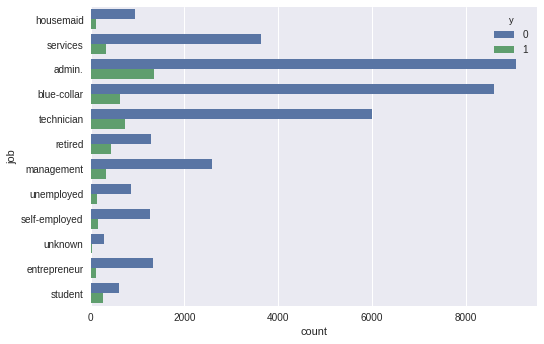

In [1316]:
picture.countplot(y='job' , hue='y', data=data) # Grafik Ausgeben > Verhältnis zu y

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98fef24f60>,
      dtype=object)

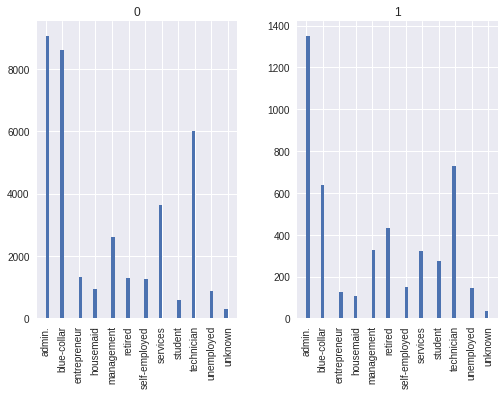

In [1317]:
data.hist(column="job",by="y",bins=50)

In [1318]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['job'].values)


# Coding Categorical Values into Labeled Values
data['job'] = label_encoder.transform(data['job'].values)
data['job'].unique() #Inhhalte von target prüfen


array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8])

###3 marital
Beziehungsstatus > Kategorie

In [1319]:
#Inhhalte von target prüfen
data['marital'].unique() 

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [1320]:
#Prozentual zeilenweise 
pd.crosstab(index=data['marital'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1).round(4)*100

y,0,1
marital,,
divorced,89.68,10.32
married,89.84,10.16
single,86.00,14.00
unknown,85.00,15.00


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


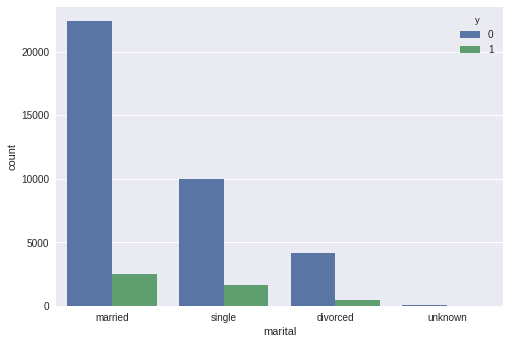

In [1321]:
# Grafig Ausgeben > Verhältnis zu y 
picture.countplot(x='marital' , hue='y', data=data) 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98fed9d9e8>,
      dtype=object)

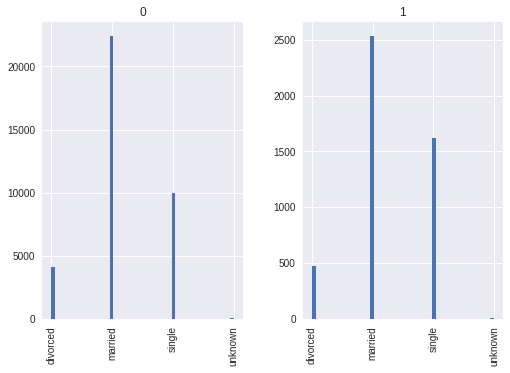

In [1322]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="marital",by="y",bins=50)


In [1323]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['marital'].values)


# Coding Categorical Values into Labeled Values
data['marital'] = label_encoder.transform(data['marital'].values)
data['marital'].unique() #Inhhalte von target prüfen


array([1, 2, 0, 3])

###4 education
Bildung > Kategorie

In [1324]:
#Feature auslesen	
#Inhhalte von target prüfen
data['education'].unique() 


array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [1325]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.education)


education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
0,3748,2104,5572,8484,14,4648,10498,1480
1,428,188,473,1031,4,595,1670,251


In [1326]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['education'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1).round(4)*100

y,0,1
education,,
basic.4y,89.75,10.25
basic.6y,91.80,8.20
basic.9y,92.18,7.82
high.school,89.16,10.84
illiterate,77.78,22.22
professional.course,88.65,11.35
university.degree,86.28,13.72
unknown,85.50,14.50


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


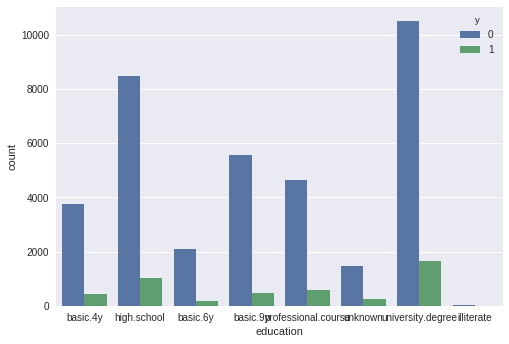

In [1327]:
# Grafig Ausgeben > Verhältnis zu y 
picture.countplot(x='education' , hue='y', data=data) # Grafik Ausgeben > Verhältnis zu y

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98feb84b38>,
      dtype=object)

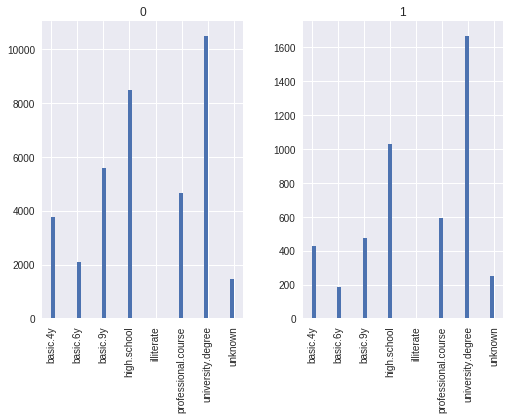

In [1328]:
# Grafig Ausgeben > Verhältnis zu y 
data.hist(column="education",by="y",bins=50)

In [1329]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['education'].values)

# Coding Categorical Values into Labeled Values
data['education'] = label_encoder.transform(data['education'].values)
data['education'].unique() #Inhhalte von target prüfen


array([0, 3, 1, 2, 5, 7, 6, 4])

###5 default
Kreditausfall > Kategorie

In [1330]:
#Feature auslesen	
#Inhhalte von target prüfen
data['default'].unique() 


array(['no', 'unknown', 'yes'], dtype=object)

In [1331]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.default)


default,no,unknown,yes
y,,,
0,28391,8154,3
1,4197,443,0


In [1332]:
#Prozentual zeilenweise 
pd.crosstab(index=data['default'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1).round(4)*100


y,0,1
default,,
no,87.12,12.88
unknown,94.85,5.15
yes,100.00,0.00


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


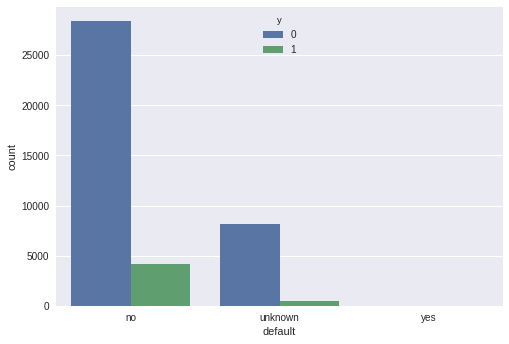

In [1333]:
# Grafig Ausgeben > Verhältnis zu y 
picture.countplot(x='default' , hue='y', data=data) 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98fe8bcb38>,
      dtype=object)

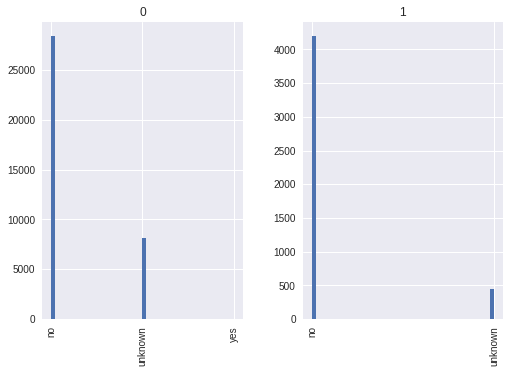

In [1334]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="default",by="y",bins=50)


In [1335]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['default'].values)

# Coding Categorical Values into Labeled Values
data['default'] = label_encoder.transform(data['default'].values)
data['default'].unique() #Inhhalte von target prüfen


array([0, 1, 2])

### 6 housing
Immobilienkredit >> Kategorie

In [1336]:
#Feature auslesen	
#Inhhalte von target prüfen
data['housing'].unique() 


array(['no', 'yes', 'unknown'], dtype=object)

In [1337]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.housing)


housing,no,unknown,yes
y,,,
0,16596,883,19069
1,2026,107,2507


In [1338]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['housing'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1).round(4)*100


y,0,1
housing,,
no,89.12,10.88
unknown,89.19,10.81
yes,88.38,11.62


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


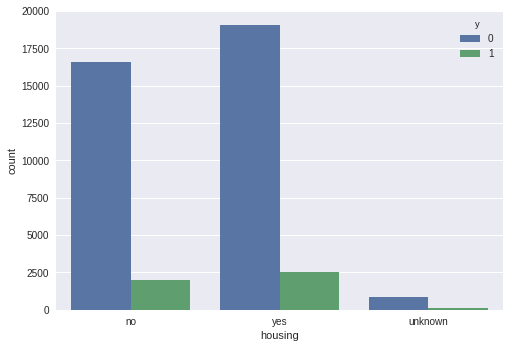

In [1339]:
# Grafig Ausgeben > Verhältnis zu y 
picture.countplot(x='housing' , hue='y', data=data) 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98fe7595c0>,
      dtype=object)

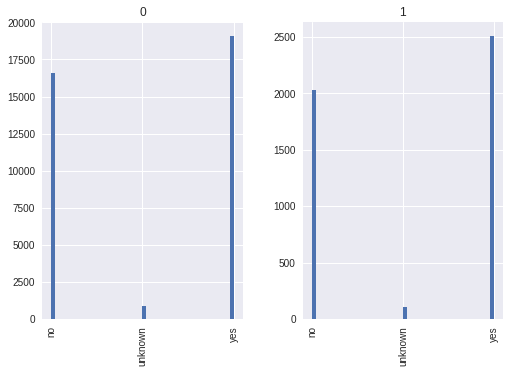

In [1340]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="housing",by="y",bins=50)


In [1341]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['housing'].values)

# Coding Categorical Values into Labeled Values
data['housing'] = label_encoder.transform(data['housing'].values)
data['housing'].unique() #Inhhalte von target prüfen


array([0, 2, 1])

###7 loan 
Kredit (Darlehn) > Kategorie

In [1342]:
#Feature auslesen	
#Inhhalte von target prüfen
data['loan'].unique() 


array(['no', 'yes', 'unknown'], dtype=object)

In [1343]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.loan)


loan,no,unknown,yes
y,,,
0,30100,883,5565
1,3850,107,683


In [1344]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['loan'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1).round(4)*100


y,0,1
loan,,
no,88.66,11.34
unknown,89.19,10.81
yes,89.07,10.93


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


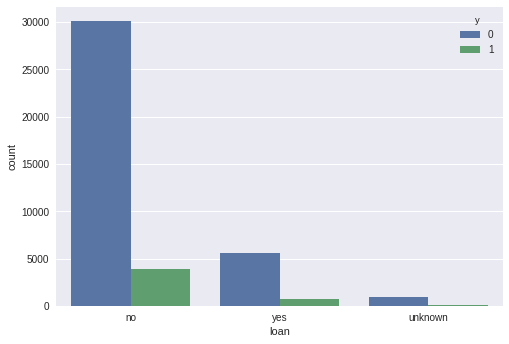

In [1345]:
# Grafig Ausgeben > Verhältnis zu y 
picture.countplot(x='loan' , hue='y', data=data) 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98fe522940>,
      dtype=object)

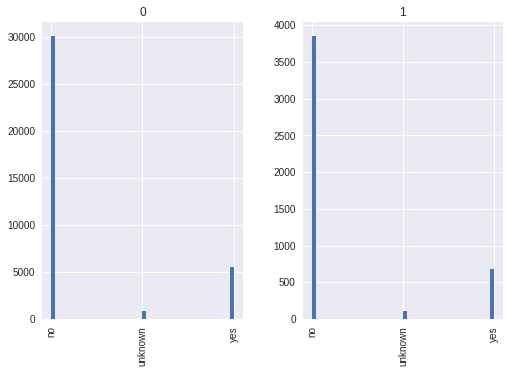

In [1346]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="loan",by="y",bins=50)


In [1347]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['loan'].values)

# Coding Categorical Values into Labeled Values
data['loan'] = label_encoder.transform(data['loan'].values)
data['loan'].unique() #Inhhalte von target prüfen


array([0, 2, 1])

###8 contact
Kontaktart (telefon etc...) > Kategorie

In [1348]:
#Feature auslesen	
#Inhhalte von target prüfen
data['contact'].unique() 


array(['telephone', 'cellular'], dtype=object)

In [1349]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.contact)


contact,cellular,telephone
y,,
0,22291,14257
1,3853,787


In [1350]:
#Prozentual zeilenweise 
pd.crosstab(index=data['contact'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1).round(4)*100


y,0,1
contact,,
cellular,85.26,14.74
telephone,94.77,5.23


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


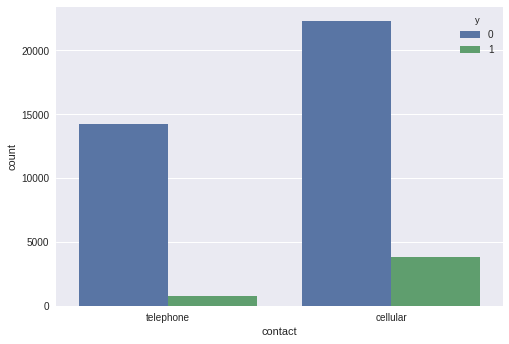

In [1351]:
picture.countplot(x='contact' , hue='y', data=data) # Grafik Ausgeben > Verhältnis zu y

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98fe303978>,
      dtype=object)

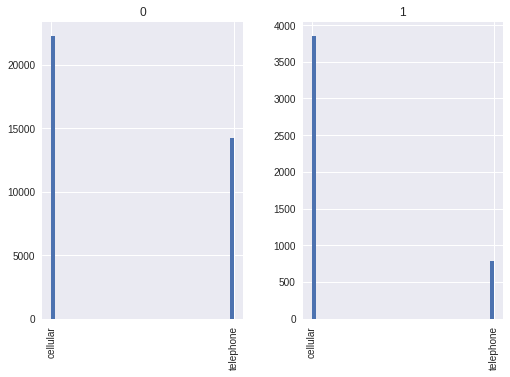

In [1352]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="contact",by="y",bins=50)


In [1353]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['contact'].values)

# Coding Categorical Values into Labeled Values
data['contact'] = label_encoder.transform(data['contact'].values)
data['contact'].unique() #Inhhalte von target prüfen


array([1, 0])

###9 month
Monat des Kontaktes > Kategorie

In [1354]:
#Inhhalte von target prüfen
data['month'].unique() 


array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [1355]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.month)


month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
0,2093,5523,93,6525,4759,270,12883,3685,403,314
1,539,655,89,649,559,276,886,416,315,256


In [1205]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['month'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1).round(4)*100

y,0,1
month,,
apr,79.52,20.48
aug,89.40,10.60
dec,51.10,48.90
jul,90.95,9.05
jun,89.49,10.51
mar,49.45,50.55
may,93.57,6.43
nov,89.86,10.14
oct,56.13,43.87


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


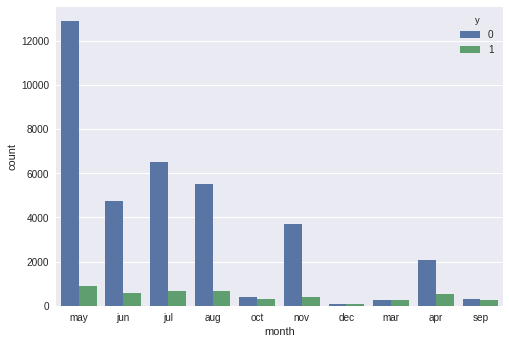

In [1206]:
picture.countplot(x='month' , hue='y', data=data) # Grafik Ausgeben > Verhältnis zu y

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9901120fd0>,
      dtype=object)

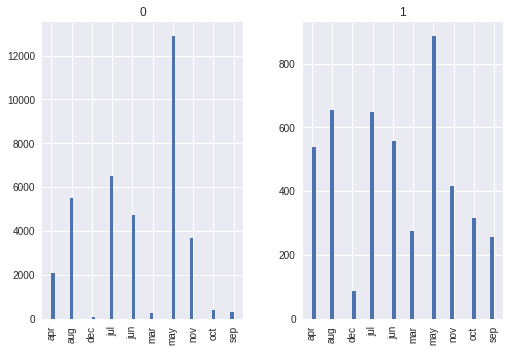

In [1207]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="month",by="y",bins=50)


In [1356]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['month'].values)

# Coding Categorical Values into Labeled Values
data['month'] = label_encoder.transform(data['month'].values)
data['month'].unique() #Inhhalte von target prüfen


array([6, 4, 3, 1, 8, 7, 2, 5, 0, 9])

###10 day_of_week 
Wochentag > Kategorie

In [1209]:
#Feature auslesen	
#Inhhalte von target prüfen
data['day_of_week'].unique() 


array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [1210]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.day_of_week)


day_of_week,fri,mon,thu,tue,wed
y,,,,,
0,6981,7667,7578,7137,7185
1,846,847,1045,953,949


In [1211]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['day_of_week'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1).round(4)*100


y,0,1
day_of_week,,
fri,89.19,10.81
mon,90.05,9.95
thu,87.88,12.12
tue,88.22,11.78
wed,88.33,11.67


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


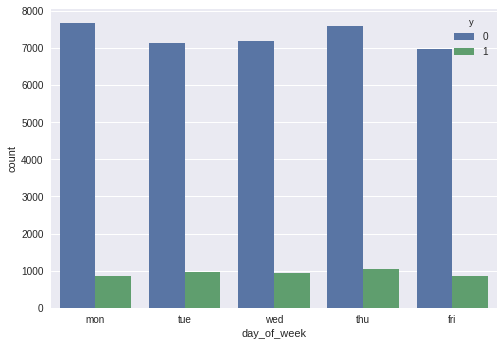

In [1212]:
picture.countplot(x='day_of_week' , hue='y', data=data) # Grafik Ausgeben > Verhältnis zu y

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9900f3a0f0>,
      dtype=object)

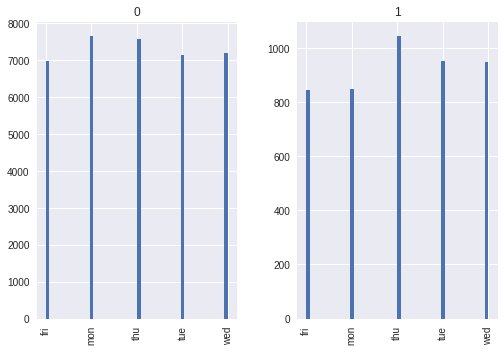

In [1213]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="day_of_week",by="y",bins=50)


In [1357]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['day_of_week'].values)

# Coding Categorical Values into Labeled Values
data['day_of_week'] = label_encoder.transform(data['day_of_week'].values)
data['day_of_week'].unique() #Inhhalte von target prüfen


array([1, 3, 4, 2, 0])

###11 duration
Kontaktdauer in s > Numerisch >





In [1215]:
#Inhhalte von target prüfen
data['duration'].unique() 


array([ 261,  149,  226, ..., 1246, 1556, 1868])

In [1216]:
#Feature kategorisieren
data['duration_class']=data['duration']
data['duration_class'] = [1  if (i >=  0    )&(i < 60  )  else i for i in data['duration_class']]
data['duration_class'] = [2  if (i >=  60   )&(i < 120 )  else i for i in data['duration_class']]
data['duration_class'] = [3  if (i >=  120  )&(i < 180 )  else i for i in data['duration_class']]
data['duration_class'] = [4  if (i >=  180  )&(i < 240 )  else i for i in data['duration_class']]
data['duration_class'] = [5  if (i >=  240  )&(i < 300 )  else i for i in data['duration_class']]
data['duration_class'] = [10 if (i >=  300  )&(i < 600 )  else i for i in data['duration_class']]
data['duration_class'] = [15 if (i >=  600  )&(i < 900 )  else i for i in data['duration_class']]
data['duration_class'] = [20 if (i >=  900  )&(i < 1200)  else i for i in data['duration_class']]
data['duration_class'] = [25 if (i >=  1200 )&(i < 1500)  else i for i in data['duration_class']]
data['duration_class'] = [30 if (i >=  1500 )&(i < 1800)  else i for i in data['duration_class']]
data['duration_class'] = [35 if (i >=  1800 )&(i < 2100)  else i for i in data['duration_class']]
data['duration_class'] = [40 if (i >=  2100 )&(i < 2400)  else i for i in data['duration_class']]
data['duration_class'] = [45 if (i >=  2400 )&(i < 2700)  else i for i in data['duration_class']]
data['duration_class'] = [50 if (i >=  2700 )             else i for i in data['duration_class']]
data.duration_class.head(7)


0     5
1     3
2     4
3     3
4    10
5     4
6     3
Name: duration_class, dtype: int64

In [1217]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.duration_class)


duration_class,1,2,3,4,5,10,15,20,25,30,35,40,45,50
y,,,,,,,,,,,,,,
0,4180,8451,7399,5014,3385,6331,1266,328,117,36,22,6,3,10
1,1,163,394,491,460,1441,928,441,191,70,34,8,10,8


In [1218]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['duration_class'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1) .round(4)*100


y,0,1
duration_class,,
1,99.98,0.02
2,98.11,1.89
3,94.94,5.06
4,91.08,8.92
5,88.04,11.96
10,81.46,18.54
15,57.70,42.30
20,42.65,57.35
25,37.99,62.01


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


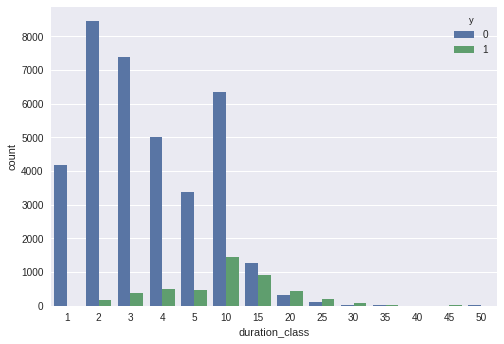

In [1219]:
picture.countplot(x='duration_class' , hue='y', data=data) # Grafik Ausgeben > Verhältnis zu y

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9900c26cf8>,
      dtype=object)

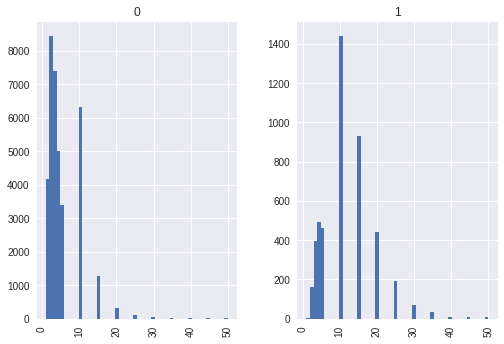

In [1220]:
data.hist(column="duration_class",by="y",bins=50)

In [1358]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['duration_class'].values)

# Coding Categorical Values into Labeled Values
data['duration_class'] = label_encoder.transform(data['duration_class'].values)
data['duration_class'].unique() #Inhhalte von target prüfen


KeyError: ignored

###12 campaign
Anzahl Kontakte > numerisch

In [1222]:
#Feature auslesen	
#Inhhalte von target prüfen
data['campaign'].unique() 


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

In [1223]:
#Feature kategorisieren
data['campaign_class']=data['campaign']


data['campaign_class'] = [99 if (i >20 )           else i for i in data['campaign_class']]
data.age_class.head()


0    4
1    4
2    2
3    3
4    4
Name: age_class, dtype: int64

In [1224]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.campaign_class)


campaign_class,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,99
y,,,,,,,,,,,,,,,,,,,,,
0,15342,9359,4767,2402,1479,904,591,383,266,213,...,122,88,68,49,51,54,33,26,30,156
1,2300,1211,574,249,120,75,38,17,17,12,...,3,4,1,2,0,4,0,0,0,1


In [1225]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['campaign_class'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1) .round(4)*100


y,0,1
campaign_class,,
1,86.96,13.04
2,88.54,11.46
3,89.25,10.75
4,90.61,9.39
5,92.50,7.50
6,92.34,7.66
7,93.96,6.04
8,95.75,4.25
9,93.99,6.01


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


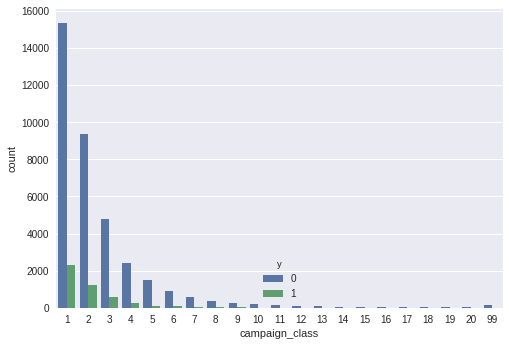

In [1226]:
picture.countplot(x='campaign_class' , hue='y', data=data) # Grafik Ausgeben > Verhältnis zu y

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9900aa48d0>,
      dtype=object)

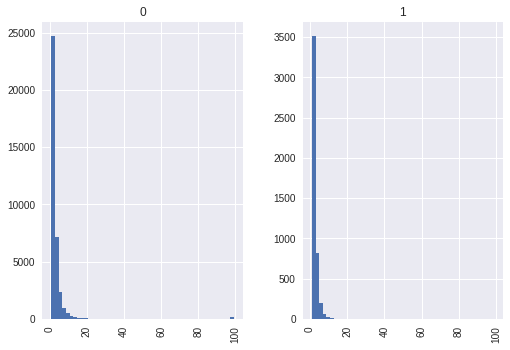

In [1227]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="campaign_class",by="y",bins=50)


In [1359]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['campaign_class'].values)

# Coding Categorical Values into Labeled Values
data['campaign_class'] = label_encoder.transform(data['campaign_class'].values)
data['campaign_class'].unique() #Inhhalte von target prüfen


KeyError: ignored

###13 pdays
Vergangene Tage bis zum Kontakt der letzten campain > Numerisch > 999 = kein vorheriger Kontakt

In [1229]:
#Feature auslesen	
#Inhhalte von target prüfen
data['pdays'].unique() 


array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [1230]:
#Feature kategorisieren
data['pdays_class']=data['pdays']
data['pdays_class'] = [1 if (i >= 0)&(i< 999) else i for i in data['pdays_class']]

data.age_class.head()


0    4
1    4
2    2
3    3
4    4
Name: age_class, dtype: int64

In [1231]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.pdays_class)


pdays_class,1,999
y,,
0,548,36000
1,967,3673


In [1232]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['pdays_class'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1) .round(4)*100


y,0,1
pdays_class,,
1,36.17,63.83
999,90.74,9.26


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


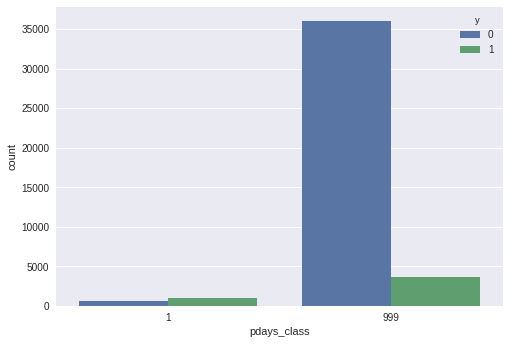

In [1233]:
picture.countplot(x='pdays_class' , hue='y', data=data) # Grafik Ausgeben > Verhältnis zu y

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9900835898>,
      dtype=object)

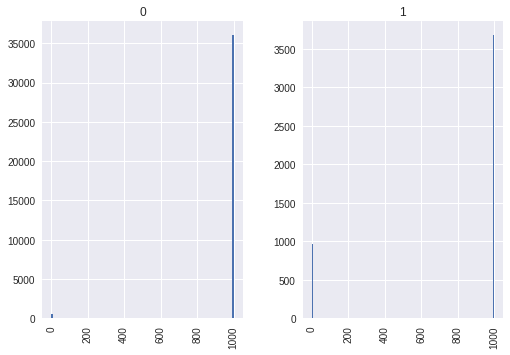

In [1234]:
data.hist(column="pdays_class",by="y",bins=150)

In [1360]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['pdays_class'].values)

# Coding Categorical Values into Labeled Values
data['pdays_class'] = label_encoder.transform(data['pdays_class'].values)
data['pdays_class'].unique() #Inhhalte von target prüfen


KeyError: ignored

###14 previous
Anzahl vorheriger Kontakte gesammt > Numerisch


In [1236]:
#Feature auslesen	
#Inhhalte von target prüfen
data['previous'].unique() 


array([0, 1, 2, 3, 4, 5, 6, 7])

In [1237]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.previous)


previous,0,1,2,3,4,5,6,7
y,,,,,,,,
0,32422,3594,404,88,32,5,2,1
1,3141,967,350,128,38,13,3,0


In [1238]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['previous'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1) .round(4)*100


y,0,1
previous,,
0,91.17,8.83
1,78.80,21.20
2,53.58,46.42
3,40.74,59.26
4,45.71,54.29
5,27.78,72.22
6,40.00,60.00
7,100.00,0.00


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


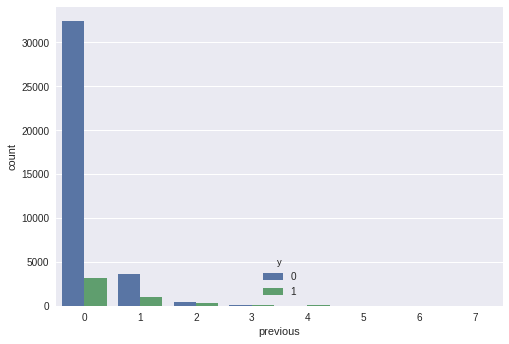

In [1239]:
picture.countplot(x='previous' , hue='y', data=data) # Grafik Ausgeben > Verhältnis zu y

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9900604c50>,
      dtype=object)

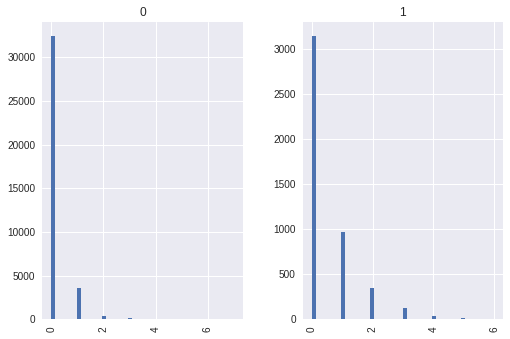

In [1240]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="previous",by="y",bins=50)


In [1361]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['previous'].values)

# Coding Categorical Values into Labeled Values
data['previous'] = label_encoder.transform(data['previous'].values)
data['previous'].unique() #Inhhalte von target prüfen


array([0, 1, 2, 3, 4, 5, 6, 7])

###15 poutcome
vorheriges Ergebnis > Kategorie > Ergebnis der vorherigen Campain

In [1242]:
#Feature auslesen	
#Inhhalte von target prüfen
data['poutcome'].unique() 


array(['nonexistent', 'failure', 'success'], dtype=object)

In [1243]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.poutcome)


poutcome,failure,nonexistent,success
y,,,
0,3647,32422,479
1,605,3141,894


In [1244]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['poutcome'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1) .round(4)*100


y,0,1
poutcome,,
failure,85.77,14.23
nonexistent,91.17,8.83
success,34.89,65.11


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


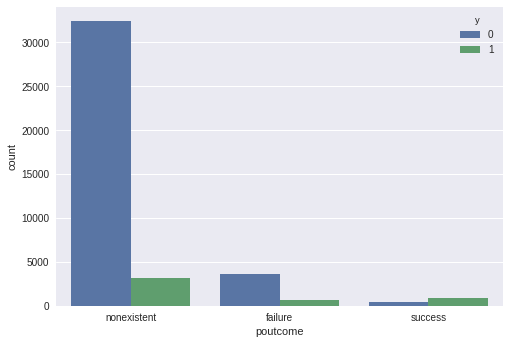

In [1245]:
picture.countplot(x='poutcome' , hue='y', data=data) # Grafik Ausgeben > Verhältnis zu y

In [1362]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['poutcome'].values)

# Coding Categorical Values into Labeled Values
data['poutcome'] = label_encoder.transform(data['poutcome'].values)
data['poutcome'].unique() #Inhhalte von target prüfen


array([1, 0, 2])

###16 emp.var.rate
Beschäftigungsquore? > employment variation rate - quarterly indicator (numeric)

In [1246]:
data['emp.var.rate'].unique() #Inhhalte von target prüfen

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [1247]:
data.groupby(['y'])['emp.var.rate'].mean()

y
0    0.248875
1   -1.233448
Name: emp.var.rate, dtype: float64

In [1248]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['emp.var.rate'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1) .round(4)*100


y,0,1
emp.var.rate,,
-3.4,57.61,42.39
-3.0,48.84,51.16
-2.9,64.28,35.72
-1.8,84.09,15.91
-1.7,47.87,52.13
-1.1,52.60,47.40
-0.2,90.00,10.00
-0.1,93.70,6.30
1.1,96.91,3.09


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


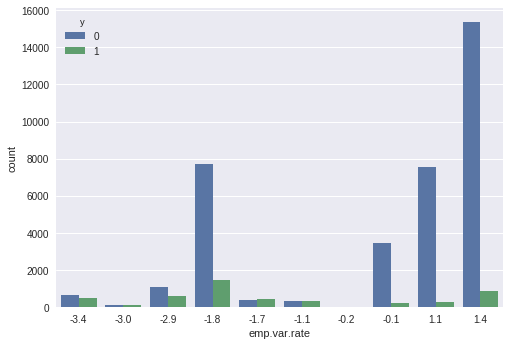

In [1249]:
picture.countplot(x='emp.var.rate' , hue='y', data=data) # Grafik Ausgeben > Verhältnis zu y

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f990014f4a8>,
      dtype=object)

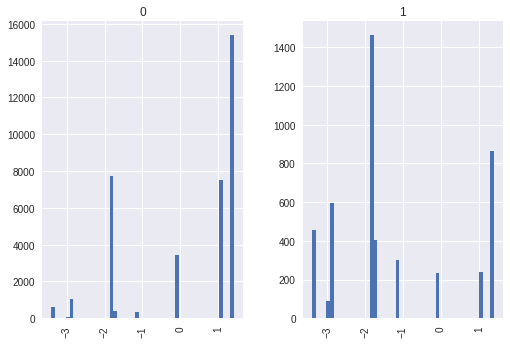

In [1250]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="emp.var.rate",by="y",bins=50)


In [1363]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['emp.var.rate'].values)

# Coding Categorical Values into Labeled Values
data['emp.var.rate'] = label_encoder.transform(data['emp.var.rate'].values)
data['emp.var.rate'].unique() #Inhhalte von target prüfen


array([8, 9, 7, 6, 3, 2, 0, 1, 4, 5])

### 17 cons.price.idx
Verbraucher Preis Index > consumer price index - monthly indicator (numeric)


In [1252]:
#Feature auslesen	
#Inhhalte von target prüfen
data['cons.price.idx'].unique() 


array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [1253]:
#Feature kategorisieren
data['cons_price_idx_class']=data['cons.price.idx']
data['cons_price_idx_class'] = [1 if (i > 92.000)&(i <= 92.500) else i for i in data['cons_price_idx_class']]
data['cons_price_idx_class'] = [2 if (i > 92.500)&(i <= 93.000) else i for i in data['cons_price_idx_class']]
data['cons_price_idx_class'] = [3 if (i > 93.000)&(i <= 93.500) else i for i in data['cons_price_idx_class']]
data['cons_price_idx_class'] = [4 if (i > 93.500)&(i <= 94.000) else i for i in data['cons_price_idx_class']]
data['cons_price_idx_class'] = [5 if (i > 94.000)&(i <= 94.500) else i for i in data['cons_price_idx_class']]
data['cons_price_idx_class'] = [6 if (i >= 92.500) else i for i in data['cons_price_idx_class']]
data.age_class.head()


0    4
1    4
2    2
3    3
4    4
Name: age_class, dtype: int64

In [1254]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['cons_price_idx_class'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1) .round(4)*100


y,0,1
cons_price_idx_class,,
1.0,62.94,37.06
2.0,84.02,15.98
3.0,90.85,9.15
4.0,93.91,6.09
5.0,86.40,13.60
6.0,54.52,45.48


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


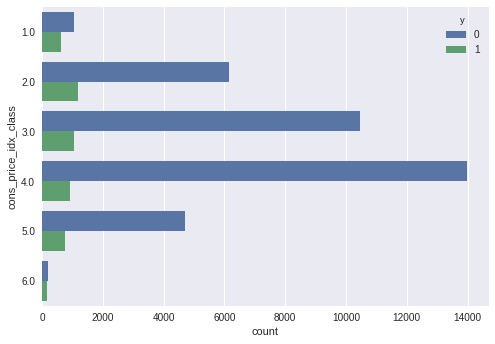

In [1255]:
# Grafig Ausgeben > Verhältnis zu y 
picture.countplot(y='cons_price_idx_class' , hue='y', data=data) 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98fff50208>,
      dtype=object)

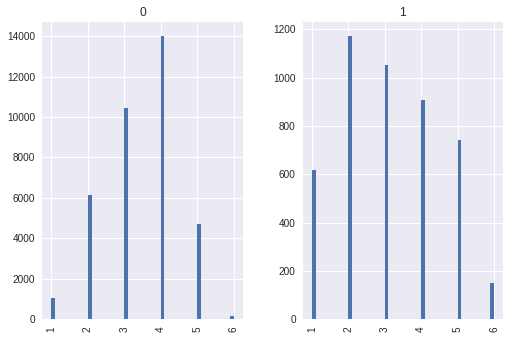

In [1256]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="cons_price_idx_class",by="y",bins=50)


In [1364]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['cons_price_idx_class'].values)

# Coding Categorical Values into Labeled Values
data['cons_price_idx_class'] = label_encoder.transform(data['cons_price_idx_class'].values)
data['cons_price_idx_class'].unique() #Inhhalte von target prüfen


KeyError: ignored

###18 cons.conf.idx
Kunden Vertrauen > consumer confidence index - monthly indicator (numeric)

In [1258]:
#Feature auslesen	
#Inhhalte von target prüfen
data['cons.conf.idx'].unique() 


array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [1259]:
data.groupby(['y'])['cons.conf.idx'].mean()

y
0   -40.593097
1   -39.789784
Name: cons.conf.idx, dtype: float64

In [1260]:
#Feature kategorisieren
data['cons_conf_idx_class']=data['cons.conf.idx']
data['cons_conf_idx_class'] = [1 if (i < -1 )&(i >= -20) else i for i in data['cons_conf_idx_class']]
data['cons_conf_idx_class'] = [2 if (i < -21)&(i >= -25) else i for i in data['cons_conf_idx_class']]
data['cons_conf_idx_class'] = [3 if (i < -25)&(i >= -30) else i for i in data['cons_conf_idx_class']]
data['cons_conf_idx_class'] = [4 if (i < -30)&(i >= -35) else i for i in data['cons_conf_idx_class']]
data['cons_conf_idx_class'] = [5 if (i < -35)&(i >= -40) else i for i in data['cons_conf_idx_class']]
data['cons_conf_idx_class'] = [6 if (i < -40)&(i >= -45) else i for i in data['cons_conf_idx_class']]
data['cons_conf_idx_class'] = [7 if (i < -45)&(i >= -50) else i for i in data['cons_conf_idx_class']]
data['cons_conf_idx_class'] = [8 if (i < -50)            else i for i in data['cons_conf_idx_class']]

data.age_class.head(20)


0     4
1     4
2     2
3     3
4     4
5     3
6     4
7     3
8     1
9     1
10    3
11    1
12    1
13    4
14    2
15    4
16    2
17    3
18    4
19    2
Name: age_class, dtype: int64

In [1261]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['cons_conf_idx_class'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1) .round(4)*100


y,0,1
cons_conf_idx_class,,
3.0,59.94,40.06
4.0,56.50,43.50
5.0,92.74,7.26
6.0,91.96,8.04
7.0,86.44,13.56
8.0,54.69,45.31


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


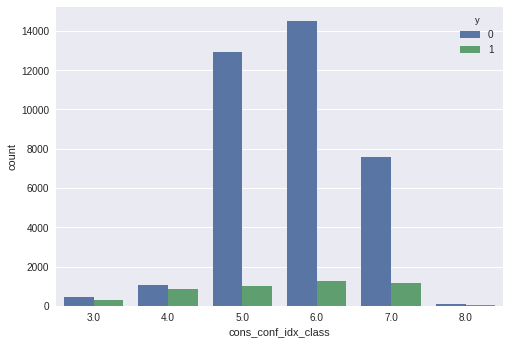

In [1262]:
# Grafig Ausgeben > Verhältnis zu y 
picture.countplot(x='cons_conf_idx_class' , hue='y', data=data) 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98ffca8390>,
      dtype=object)

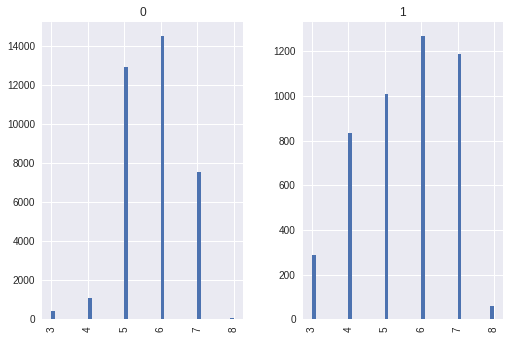

In [1263]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="cons_conf_idx_class",by="y",bins=50)


In [1365]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['cons_conf_idx_class'].values)

# Coding Categorical Values into Labeled Values
data['cons_conf_idx_class'] = label_encoder.transform(data['cons_conf_idx_class'].values)
data['cons_conf_idx_class'].unique() #Inhhalte von target prüfen


KeyError: ignored

###19 euribor3m
Referenzzinssatz für Termingelder, zur ermittlung von Krediten > euribor 3 month rate - daily indicator (numeric)

In [1265]:
#Feature auslesen	
#Inhhalte von target prüfen
data['euribor3m'].unique() 


array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [1266]:
#Feature kategorisieren
data['euribor3m_class']=data['euribor3m']
data['euribor3m_class'] = [1 if (i >0)&(i <= 1.000) else i for i in data['euribor3m_class']]
data['euribor3m_class'] = [2 if (i >1.000)&(i <= 2.000) else i for i in data['euribor3m_class']]
data['euribor3m_class'] = [3 if (i >2.000)&(i <= 3.000) else i for i in data['euribor3m_class']]
data['euribor3m_class'] = [4 if (i >3.000)&(i <= 4.000) else i for i in data['euribor3m_class']]
data['euribor3m_class'] = [5 if (i >4.000)             else i for i in data['euribor3m_class']]
data.age_class.head()


0    4
1    4
2    2
3    3
4    4
Name: age_class, dtype: int64

In [1267]:
#Feature mit target in verbindung setzen
pd.crosstab(data.y, data.euribor3m_class)


euribor3m_class,1.0,2.0,4.0,5.0
y,,,,
0,2122,8075,13,26338
1,1786,1515,1,1338


In [1268]:

 #Prozentual zeilenweise 
pd.crosstab(index=data['euribor3m_class'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1) .round(4)*100


y,0,1
euribor3m_class,,
1.0,54.30,45.70
2.0,84.20,15.80
4.0,92.86,7.14
5.0,95.17,4.83


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


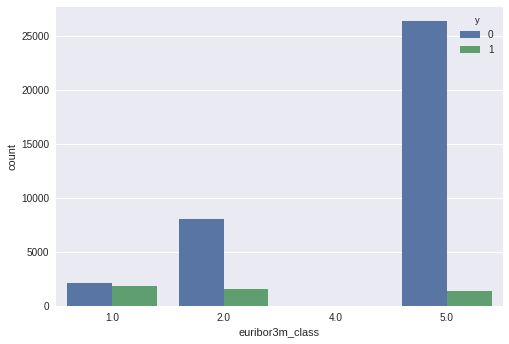

In [1269]:
# Grafig Ausgeben > Verhältnis zu y 
picture.countplot(x='euribor3m_class' , hue='y', data=data) 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98ff9faef0>,
      dtype=object)

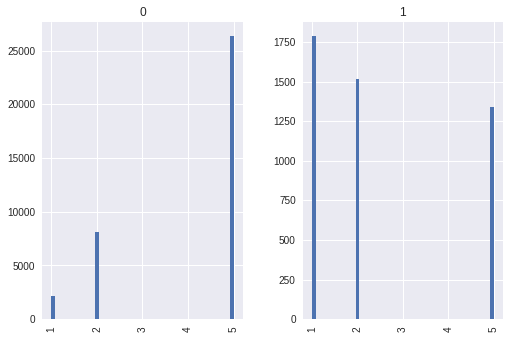

In [1270]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="euribor3m_class",by="y",bins=50)


In [1366]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['euribor3m_class'].values)

# Coding Categorical Values into Labeled Values
data['euribor3m_class'] = label_encoder.transform(data['euribor3m_class'].values)
data['euribor3m_class'].unique() #Inhhalte von target prüfen


KeyError: ignored

###20 nr.employed
Anzahl von angestellten > number of employees - quarterly indicator (numeric)

In [1272]:
#Feature auslesen	
#Inhhalte von target prüfen
data['nr.employed'].unique() 


array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [1273]:
 #Prozentual zeilenweise 
pd.crosstab(index=data['nr.employed'], columns=data['y'], margins=False).apply(lambda zeile: zeile/zeile.sum(), axis=1) .round(4)*100


y,0,1
nr.employed,,
4963.6,52.60,47.40
4991.6,47.87,52.13
5008.7,43.23,56.77
5017.5,57.61,42.39
5023.5,48.84,51.16
5076.2,64.28,35.72
5099.1,87.20,12.80
5176.3,90.00,10.00
5191.0,96.91,3.09


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


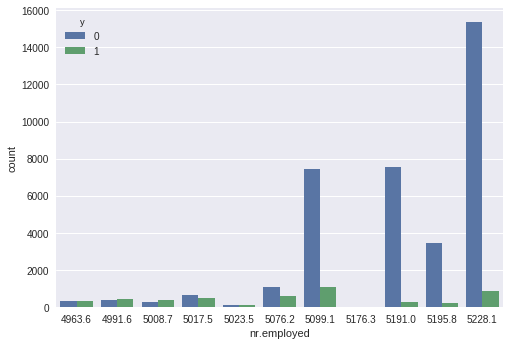

In [1274]:
# Grafig Ausgeben > Verhältnis zu y 
picture.countplot(x='nr.employed' , hue='y', data=data) 


/usr/local/lib/python3.6/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98ff9abe80>,
      dtype=object)

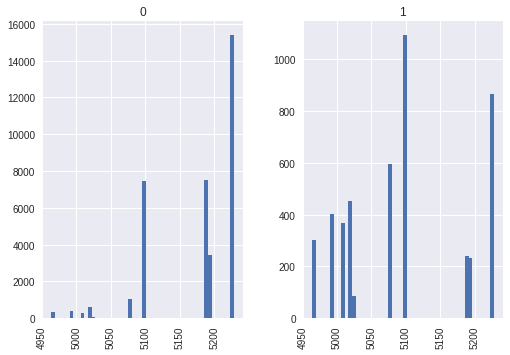

In [1275]:
# Grafig Ausgeben > Verhältnis zu y
data.hist(column="nr.employed",by="y",bins=50)


In [1367]:
#Format umwandeln
# Initialize label encoder for labeling categorical values.   text in wertebereich konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(data['nr.employed'].values)

# Coding Categorical Values into Labeled Values
data['nr.employed'] = label_encoder.transform(data['nr.employed'].values)
data['nr.employed'].unique() #Inhhalte von target prüfen


array([ 8, 10,  9,  7,  6,  5,  3,  4,  2,  1,  0])

#Auswahl Features

##Beobachtungen:

- Durchschnittsalter der Käufer maginal höher als der nichtkäufer

- pdays = bei geringen pdays 2-8 sind deutlich mehr Käufer als nichtkäufer 

- Campaingn 

- job title can be a good predictor of the outcome variable.

- marital status does not seem a strong predictor,

- Education seems a good predictor of the outcome variable.

- Day of week may not be a good predictor of the outcome.

- Month might be a good predictor of the outcome variable.

- Most of the customers of the bank in this dataset are in the age range of 30–40.

- Poutcome seems to be a good predictor of the outcome variable.


## Features ausschließen:

In [1277]:
data.drop(data.columns[[,]], axis=1, inplace=True)

SyntaxError: ignored

#Logistic Regression

## Data Zuordnung Achsen

In [0]:
x, y = data[data.columns[0:19]].values, data['y'].values 

#daten in Matrix packen, pro [] eine Array inszanz also [[]] 2 Dimensoon Matrix, .values um in matrix zu wandeln

In [0]:
x.shape

In [0]:
x.real


In [0]:
y.shape

In [0]:
y.real

## Training with Logistic Regression with Stochastic Gradient Descent

In [1369]:
# Set Seed for "Deterministic Randomness".
#np.random.seed(1909) #lieber weglassen

# Initialize the Logisitc Regression Model.-
logistic_model = SGDClassifier(loss='log', 
                               eta0=0.001, #schrittlänge um min Punkt zu finden und nicht versehendlich zu übergehen
                               alpha=0.03, #wie stark die loss funktion gewichtet wird (bestrafung der Modellkomplexität)
                               max_iter=1000, # anzahl d. itterationsschritte begrenzen, determinator
                               random_state=8765) #hier lieber random_state setzen

# Perform the Learning.
logistic_model.fit(x, y) #fit = setze eine gerade oder eine ebene an...

SGDClassifier(alpha=0.03, average=False, class_weight=None, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=8765,
       shuffle=True, tol=None, verbose=0, warm_start=False)

###Prediction

In [0]:
# Perform the Prediction for a student has been sleeping 20 hours and has been learning 8 hours.
y_pred = logistic_model.predict([[20,2,2,2,2,2,2,2,2,2,2,2,8,2,2,2,2,2,2]])
y_pred_probabilities = logistic_model.predict_proba([[20,2,2,2,2,2,2,2,2,2,2,2,8,2,2,2,2,2,2]])

###Result

In [1373]:
print('Exam performance for a student has been sleeping 20 hours and has been learning 8 hours:')

# Predict class for a student who has slept 20 hours and has learnt 8 hours.
print(f'- Passing: {bool(y_pred[0])}')

# Predict class probabilities for a student who has slept 20 hours and has learnt 8 hours.
print(f'- Probability on failing: {y_pred_probabilities[0][0] * 100:.2f}%')
print(f'- Probabilitiy on passing: {y_pred_probabilities[0][1] * 100:.2f}%')

Exam performance for a student has been sleeping 20 hours and has been learning 8 hours:
- Passing: False
- Probability on failing: 96.14%
- Probabilitiy on passing: 3.86%


#Evaluation

##Holdout Method

einen teil zum testen weglassen

In [1374]:
# Set Seed for "Deterministic Randomness".
np.random.seed(1909)

# Train-Test-Split with 75% for Training and 25% for Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Perform the Learning
logistic_model.fit(x_train, y_train)

SGDClassifier(alpha=0.03, average=False, class_weight=None, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=8765,
       shuffle=True, tol=None, verbose=0, warm_start=False)

#### Prediction on Test Set

In [0]:
# Perform the Prediction on the Test-Set-Features.
y_pred = logistic_model.predict(x_test)
y_pred_probabilities = logistic_model.predict_proba(x_test)

###Result

In [1377]:
# Calculating various performance measures.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')    # trefferchance, acc + f1 nah = balanded wenn nicht nah dann imbalanced 
print(f'Precision: {precision * 100:.2f}%')  # vorhersage
print(f'Recall: {recall * 100:.2f}%')        # 
print(f'F1: {f1 * 100:.2f}%')                #

Accuracy: 90.24%
Precision: 68.55%
Recall: 26.87%
F1: 38.61%


##10-Fold Chross_Validation

###Algorithmus

In [0]:
# Set seed for "deterministic randomness".
np.random.seed(1909)

# Initialize 10-Fold-Cross-Validation.
k_fold = KFold(n_splits=10)  #teile in 10 gleich große teile

# Empty lists for persisting the performances measures calculated in each iteration. 
accuracies = []
precisions = []
recalls = []
f1s = []

#schleife, alles was eingerückt ist gehört dazu

for train_idx, test_idx in k_fold.split(x):
  # Split dataset into a train and test set.
  x_train, x_test = x[train_idx], x[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]
  
  # Run the logistic regression on the current training set.
  logistic_model = SGDClassifier(loss='log', eta0=0.001, alpha=0.03, max_iter=1000)
  logistic_model.fit(x_train, y_train)
  
  # Perform the Prediction on the Test-Set-Features.
  y_pred = logistic_model.predict(x_test)
  y_pred_probabilities = logistic_model.predict_proba(x_test)
  
  # Calculate the performance measures on the current test set.
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  
  # Append to performances measures to lists.
  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1s.append(f1)

###Result

In [1380]:
print(f'Average accuracy: {np.mean(accuracies) * 100:.2f}%') #np.mean = mittelwert
print(f'Average precision: {np.mean(precisions) * 100:.2f}%')
print(f'Average recall: {np.mean(recalls) * 100:.2f}%')
print(f'Average F1: {np.mean(f1s) * 100:.2f}%')

Average accuracy: 89.32%
Average precision: 57.88%
Average recall: 27.05%
Average F1: 30.63%


##Basic Literature

Moro S., Laureano, R., & Cortez, P. (2011). Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al, Proceedings of the European Simulation and Modelling Conference. Paper presented at the 2011 European Simulation and Modelling Conference, Guimaraes, Portugal (117-121). Belgium: EUROSIS.
Moro S., Cortez, P., & Rita, P. (2004). A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, 62, 22-31. https://doi.org/10.1016/j.dss.2014.03.001

##Source

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing